In [21]:
# Import the openbb library
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [22]:
#Download the data for the S&P 500 index
data = obb.index.price.historical("SPX", start_date="2024-01-01", end_date="2024-01-31", provider = "yfinance")
data

,open,high,low,close,volume
date,,,,,
2024-01-02,4745.200195,4754.330078,4722.669922,4742.830078,3743050000
2024-01-03,4725.069824,4729.290039,4699.709961,4704.810059,3950760000
2024-01-04,4697.419922,4726.779785,4687.529785,4688.680176,3715480000
2024-01-05,4690.569824,4721.490234,4682.109863,4697.240234,3844370000
2024-01-08,4703.700195,4764.540039,4699.819824,4763.540039,3742320000
2024-01-09,4741.930176,4765.470215,4730.350098,4756.500000,3529960000
2024-01-10,4759.939941,4790.799805,4756.200195,4783.450195,3498680000
2024-01-11,4792.129883,4798.500000,4739.580078,4780.240234,3759890000
2024-01-12,4791.180176,4802.399902,4768.979980,4783.830078,3486340000


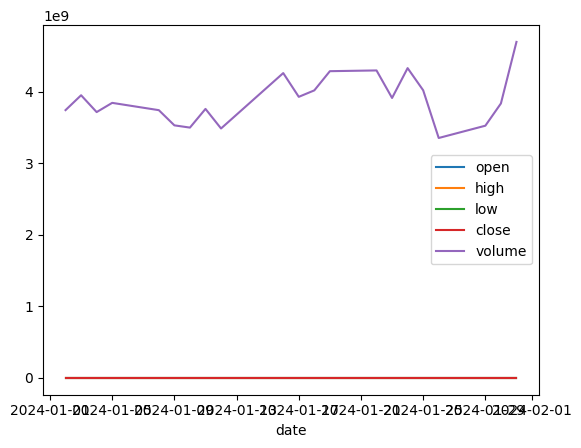

In [23]:
#Let's plot the data
data.plot()

# Let's plot a candlestick graph using Cufflinks library
# Cufflinks is a powerful Python library that connects Pandas and Plotly for generating plots using few lines of code
# Cufflinks allows for interactive data visualization

import cufflinks as cf
cf.go_offline()

data.iplot(kind='candle', x='Date', open='open', high='high', low='low', close='close', 
           title='S&P 500 Index Candlestick Chart', theme='space')

In [ ]:
from cufflinks import QuantFig

# Create and plot the figure
qf = QuantFig(data, title='S&P 500 Index Candlestick Chart', theme='space')
qf.iplot()

In [24]:
# Set the date to be the index for the Pandas DataFrame
# This is critical to show the date on the x-axis when using cufflinks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

fig.update_layout(title='S&P 500 Index Candlestick Chart',
                 yaxis_title='Stock Price',
                 template='plotly_dark')  # Using dark theme to match previous plots

fig.show()

In [25]:
#Equity Fundamentals

obb.equity.fundamental.metrics("AAPL,MSFT,NVDA,AMZN,TSLA,GOOGL,META", provider = "yfinance")

,symbol,market_cap,pe_ratio,forward_pe,peg_ratio_ttm,enterprise_to_ebitda,earnings_growth,earnings_growth_quarterly,revenue_per_share,revenue_growth,...,price_to_book,enterprise_value,overall_risk,audit_risk,board_risk,compensation_risk,shareholder_rights_risk,beta,price_return_1y,currency
0,AAPL,3.503454e+12,37.019047,28.270323,2.1472,27.070,-0.341,-0.358,25.485,0.061,...,61.911335,3645256499200,1.0,3.0,1.0,3.0,1.0,1.240,0.234441,USD
1,MSFT,3.091198e+12,33.533870,27.637518,2.1928,24.218,0.104,0.107,34.202,0.160,...,11.513775,3307079729152,3.0,9.0,5.0,3.0,2.0,0.904,-0.001980,USD
2,NVDA,3.151373e+12,50.861656,28.937597,0.8947,58.085,1.680,1.682,3.910,1.224,...,73.784400,3553896693760,8.0,7.0,10.0,5.0,6.0,1.657,0.792479,USD
3,AMZN,2.511298e+12,51.032055,38.488068,1.9409,22.887,0.521,0.552,59.486,0.110,...,9.686879,2553814188032,9.0,2.0,10.0,10.0,3.0,1.146,0.390544,USD
4,TSLA,1.204008e+12,183.490200,96.901540,5.0666,92.793,0.170,0.169,30.457,0.078,...,17.165918,1228948242432,10.0,5.0,9.0,10.0,9.0,2.295,0.994988,USD
5,GOOGL,2.346449e+12,23.830847,18.606802,1.2503,19.943,0.366,0.336,27.443,0.151,...,7.480576,2462356602880,10.0,8.0,7.0,10.0,10.0,1.034,0.311288,USD
6,META,1.803941e+12,29.790377,24.533089,2.0552,21.285,0.374,0.354,61.428,0.189,...,10.922438,1685938241536,10.0,10.0,10.0,10.0,10.0,1.215,0.499723,USD


In [26]:
dir(obb.equity.fundamental)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_credentials',
 '_command_runner',
 '_get_provider',
 '_run',
 'balance',
 'balance_growth',
 'cash',
 'cash_growth',
 'dividends',
 'employee_count',
 'filings',
 'historical_attributes',
 'historical_eps',
 'historical_splits',
 'income',
 'income_growth',
 'latest_attributes',
 'management',
 'management_compensation',
 'metrics',
 'multiples',
 'ratios',
 'reported_financials',
 'revenue_per_geography',
 'revenue_per_segment',
 'search_attributes',
 'trailing_dividend_yield',
 'transcript']

In [27]:
#Let's download the price data for the company
data = obb.equity.price.historical(symbol="BOOT")
data

,open,high,low,close,volume
date,,,,,
2006-01-03,10.25,11.36,10.25,10.70,6771
2006-01-04,10.95,10.97,10.35,10.77,8480
2006-01-05,10.59,10.72,10.37,10.60,6922
2006-01-06,10.43,10.89,10.27,10.46,6797
2006-01-09,10.46,11.02,10.46,10.67,8702
...,...,...,...,...,...
2025-01-30,174.25,176.53,172.21,174.52,1128752
2025-01-31,157.25,173.15,155.25,160.85,2619084
2025-02-03,155.02,156.54,144.15,145.52,2494881


In [28]:
#Let's download the balance sheet data for the company
ticker = obb.equity.fundamental.balance(symbol="BOOT")
ticker

,period_ending,cash_and_cash_equivalents,cash_cash_equivalents_and_short_term_investments,gross_accounts_receivable,allowance_for_doubtful_accounts_receivable,accounts_receivable,taxes_receivable,net_receivables,inventories,prepaid_assets,...,total_debt,share_issued,ordinary_shares_number,treasury_shares_number,current_deferred_assets,current_debt,net_debt,land_and_improvements,buildings_and_improvements,long_term_debt
0,2024-03-31,75847000.0,75847000.0,10564000.0,-600000.0,9964000.0,10268000.0,20232000.0,599120000.0,23936000.0,...,466757000.0,30572000.0,30344000.0,228000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-31,18193000.0,18193000.0,13545000.0,-400000.0,13145000.0,0.0,13145000.0,589494000.0,37417000.0,...,447719000.0,30072000.0,29880000.0,192000.0,464000.0,66043000.0,47850000.0,NaN,NaN,NaN
2,2022-03-31,20674000.0,20674000.0,9962000.0,-300000.0,9662000.0,2205000.0,11867000.0,474300000.0,28150000.0,...,306250000.0,29820000.0,29685000.0,135000.0,179000.0,28549000.0,7875000.0,0.0,0.0,NaN
3,2021-03-31,73148000.0,73148000.0,13071000.0,-300000.0,12771000.0,0.0,12771000.0,275760000.0,9605000.0,...,331017000.0,29348000.0,29252000.0,96000.0,251000.0,NaN,36633000.0,0.0,0.0,109781000.0
4,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,376000.0,129900000.0,169359000.0,0.0,0.0,109022000.0


In [29]:
#Let's download the income statement data for the company
ticker = obb.equity.fundamental.income(symbol="BOOT")
ticker

,period_ending,operating_revenue,total_revenue,cost_of_revenue,gross_profit,selling_general_and_admin_expense,operating_expense,operating_income,interest_expense_non_operating,net_non_operating_interest_income_expense,...,interest_expense,net_interest_income,ebit,ebitda,reconciled_cost_of_revenue,reconciled_depreciation,net_income_from_continuing_operation_net_minority_interest,normalized_ebitda,tax_rate_for_calcs,tax_effect_of_unusual_items
0,2024-03-31,1.667009e+09,1.667009e+09,1.052585e+09,614424000.0,416210000.0,416210000.0,198214000.0,2238000.0,-2238000.0,...,2238000.0,-2238000.0,199610000.0,249195000.0,1.052585e+09,49585000.0,146996000.0,249195000.0,0.255,0.0
1,2023-03-31,1.657615e+09,1.657615e+09,1.047043e+09,610572000.0,378785000.0,378785000.0,231787000.0,5880000.0,-5880000.0,...,5880000.0,-5880000.0,231758000.0,267703000.0,1.047043e+09,35945000.0,170553000.0,267703000.0,0.245,0.0
2,2022-03-31,1.488256e+09,1.488256e+09,9.131830e+08,575073000.0,316735000.0,316735000.0,258338000.0,5780000.0,-5780000.0,...,5780000.0,-5780000.0,258373000.0,285725000.0,9.131830e+08,27352000.0,192450000.0,285725000.0,0.238,0.0
3,2021-03-31,8.934910e+08,8.934910e+08,5.986120e+08,294879000.0,208553000.0,208553000.0,86326000.0,9442000.0,-9442000.0,...,9442000.0,-9442000.0,86692000.0,110840000.0,5.986120e+08,24148000.0,59386000.0,110840000.0,0.232,0.0


In [30]:
#Let's download the news data for the company
news = obb.news.company(symbol="BOOT")
news

,title,url,symbols,source
date,,,,
2015-11-05 07:55:36-05:00,Factors Moving Markets - Research on Innerwork...,https://money.tmx.com/quote/BOOT/news/69576053,BOOT,ACCESS Newswire via QuoteMedia
2015-11-10 08:20:30-05:00,The Price Data Tells the Story - Research on W...,https://money.tmx.com/quote/BOOT/news/69697322,BOOT,ACCESS Newswire via QuoteMedia
2015-11-17 08:06:06-05:00,"Moving Ahead of Averages, Technical Review - R...",https://money.tmx.com/quote/BOOT/news/69859684,BOOT,ACCESS Newswire via QuoteMedia
2015-11-25 08:47:34-05:00,Trading Ahead of Upcoming Developments - Resea...,https://money.tmx.com/quote/BOOT/news/70040803,BOOT,ACCESS Newswire via QuoteMedia
2017-06-08 08:20:04-04:00,Earnings Highlights and Review: Ross Stores' Q...,https://money.tmx.com/quote/BOOT/news/77633665...,BOOT,ACCESS Newswire via QuoteMedia
2017-08-01 12:03:25-04:00,"Investor Network: Boot Barn Holdings, Inc. to ...",https://money.tmx.com/quote/BOOT/news/53281082...,BOOT,ACCESS Newswire via QuoteMedia
2024-05-07 16:05:00-04:00,"Boot Barn Holdings, Inc. to Report Fourth Quar...",https://money.tmx.com/quote/BOOT/news/55722204...,BOOT,Business Wire via QuoteMedia
2024-05-14 16:10:00-04:00,"Boot Barn Holdings, Inc. Announces Fourth Quar...",https://money.tmx.com/quote/BOOT/news/66785797...,BOOT,Business Wire via QuoteMedia
2024-05-15 16:05:00-04:00,"Boot Barn Holdings, Inc. Announces May and Jun...",https://money.tmx.com/quote/BOOT/news/48598116...,BOOT,Business Wire via QuoteMedia


In [31]:
#Let's download the metrics data for the company
metrics = obb.equity.fundamental.metrics(symbol="BOOT",period="annual")
metrics

,symbol,market_cap,pe_ratio,foward_pe,eps,price_to_sales,price_to_book,book_value_per_share,price_to_cash,cash_per_share,...,long_term_debt_to_equity,quick_ratio,current_ratio,gross_margin,profit_margin,operating_margin,return_on_assets,return_on_investment,return_on_equity,payout_ratio
0,BOOT,4.320000e+09,25.22,20.55,5.6,2.34,3.96,35.65,28.27,5.0,...,0.43,0.51,2.19,0.3727,0.0936,0.1235,0.0938,0.1107,0.1727,0.0


In [32]:
#Let's download the metrics data for the company
metrics = obb.equity.fundamental.metrics("AAPL, MSFT, TSLA",
                                           provider = "finviz"
                                          )
metrics

,symbol,market_cap,pe_ratio,foward_pe,eps,price_to_sales,price_to_book,book_value_per_share,price_to_cash,cash_per_share,...,long_term_debt_to_equity,quick_ratio,current_ratio,gross_margin,profit_margin,operating_margin,return_on_assets,return_on_investment,return_on_equity,payout_ratio
0,AAPL,3.503450e+12,37.01,28.40,6.30,8.85,52.55,4.44,65.15,3.58,...,1.26,0.88,0.92,0.4652,0.2430,0.3176,0.2757,0.6380,1.3652,0.1611
1,MSFT,3.091200e+12,33.49,27.59,12.42,11.81,10.21,40.71,43.20,9.63,...,0.30,1.34,1.35,0.6941,0.3543,0.4496,0.1847,0.2360,0.3429,0.2542
2,TSLA,1.204010e+12,183.64,99.36,2.04,12.32,16.51,22.67,32.49,11.52,...,0.14,1.61,2.02,0.1786,0.0730,0.0794,0.0624,0.0856,0.1052,0.0000


In [33]:
# Transpose the DataFrame and apply formatting to avoid scientific notation
metrics_transposed = metrics.set_index("symbol").T

# Use the 'applymap' function to format each cell as a readable number with three decimal places
metrics_transposed = metrics_transposed.applymap(lambda x: f"{x:,.3f}")

# Display the result
metrics_transposed

/var/folders/_b/93bl84d17sg71ckcmxm2jrmw0000gn/T/ipykernel_74955/1608591336.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



symbol,AAPL,MSFT,TSLA
market_cap,"3,503,450,000,000.000","3,091,200,000,000.000","1,204,010,000,000.000"
pe_ratio,37.010,33.490,183.640
foward_pe,28.400,27.590,99.360
eps,6.300,12.420,2.040
price_to_sales,8.850,11.810,12.320
price_to_book,52.550,10.210,16.510
book_value_per_share,4.440,40.710,22.670
price_to_cash,65.150,43.200,32.490
cash_per_share,3.580,9.630,11.520
price_to_free_cash_flow,35.640,44.140,336.220


In [34]:
#Let's download the industry data for the company
industry = obb.equity.compare.groups(groups = "sector",
                                     metric= "overview",
                                     provider = "finviz"
                                    )
industry

/opt/anaconda3/envs/smu/lib/python3.10/site-packages/openbb_core/app/command_runner.py:139: OpenBBWarning:

Parameter 'groups' not found.



,name,market_cap,performance_1d,dividend_yield,pe,forward_pe,peg,float_short,volume,Stocks
0,Energy,3522630000000,-0.0130,0.0454,13.17,11.23,2.48,0.0266,595660000,254
1,Healthcare,8038400000000,-0.0085,0.0163,34.37,17.65,3.56,0.0468,1820000000,1176
2,Utilities,1638020000000,0.0004,0.0291,20.65,17.23,2.45,0.0221,259380000,110
3,Industrials,5929310000000,0.0017,0.0131,25.40,20.30,2.45,0.0402,830770000,669
4,Real Estate,1664270000000,0.0036,0.0376,37.44,31.42,21.31,0.0454,294530000,266
5,Consumer Cyclical,8949310000000,0.0041,0.0076,28.63,22.93,2.71,0.0455,1690000000,568
6,Communication Services,9311740000000,0.0043,0.0066,36.82,27.37,2.88,0.0240,1020000000,264
7,Technology,21948310000000,0.0053,0.0064,41.66,26.48,2.77,0.0282,2740000000,776
8,Basic Materials,2019890000000,0.0079,0.0225,22.81,14.85,2.84,0.0230,616310000,266
9,Consumer Defensive,4192740000000,0.0079,0.0234,26.25,20.57,3.39,0.0189,457690000,246


In [35]:
dir(obb.equity.compare)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_credentials',
 '_command_runner',
 '_get_provider',
 '_run',
 'company_facts',
 'groups',
 'peers']

In [36]:
help(obb.equity.compare.groups)


Help on method groups in module openbb.package.equity_compare:

groups(group: Annotated[Optional[str], OpenBBField(description="The group to compare - i.e., 'sector', 'industry', 'country'. Choices vary by provider.")] = None, metric: Annotated[Optional[str], OpenBBField(description="The type of metrics to compare - i.e, 'valuation', 'performance'. Choices vary by provider.")] = None, provider: Annotated[Optional[Literal['finviz']], OpenBBField(description='The provider to use, by default None. If None, the priority list configured in the settings is used. Default priority: finviz.')] = None, **kwargs) -> openbb_core.app.model.obbject.OBBject method of openbb.package.equity_compare.ROUTER_equity_compare instance
    Get company data grouped by sector, industry or country and display either performance or valuation metrics.
    
    Valuation metrics include price to earnings, price to book, price to sales ratios and price to cash flow.
    Performance metrics include the stock price ch

In [37]:
chains = obb.derivatives.options.chains(symbol = "SPY")
chains

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,SPY,605.68,SPY250206C00510000,2025-02-06,0,510.0,call,8,5,95.0550,...,95.82,93.090000,2.830,0.030401,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
1,SPY,605.68,SPY250206P00510000,2025-02-06,0,510.0,put,247,0,0.0000,...,0.00,0.005000,0.000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,SPY,605.68,SPY250206C00515000,2025-02-06,0,515.0,call,0,0,90.0550,...,0.00,88.094997,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,SPY,605.68,SPY250206P00515000,2025-02-06,0,515.0,put,102,0,0.0000,...,0.00,0.005000,0.000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,SPY,605.68,SPY250206C00520000,2025-02-06,0,520.0,call,0,0,85.0550,...,0.00,83.245003,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,SPY,605.68,SPY271217P00900000,2027-12-17,1044,900.0,put,0,0,294.9450,...,0.00,296.985001,0.000,0.000000,0.2535,-1.0000,0.0000,-0.0772,0.0000,-0.0001
9326,SPY,605.68,SPY271217C00905000,2027-12-17,1044,905.0,call,36,0,5.2804,...,0.00,5.055000,0.000,0.000000,0.1253,0.0995,0.0014,-0.0097,1.8529,1.5373
9327,SPY,605.68,SPY271217P00905000,2027-12-17,1044,905.0,put,0,0,299.9450,...,0.00,301.985001,0.000,0.000000,0.2561,-1.0000,0.0000,-0.0772,0.0000,-0.0001
9328,SPY,605.68,SPY271217C00910000,2027-12-17,1044,910.0,call,283,70,5.0226,...,4.95,4.785000,0.165,0.034483,0.1253,0.0953,0.0013,-0.0094,1.8001,1.4736


[*********************100%***********************]  1 of 1 completed


**Financial Information:**
Market Cap: 2,346,448,584,704
Trailing PE: 23.830847
Price to Book: 7.480576
Debt to Equity: 9.324


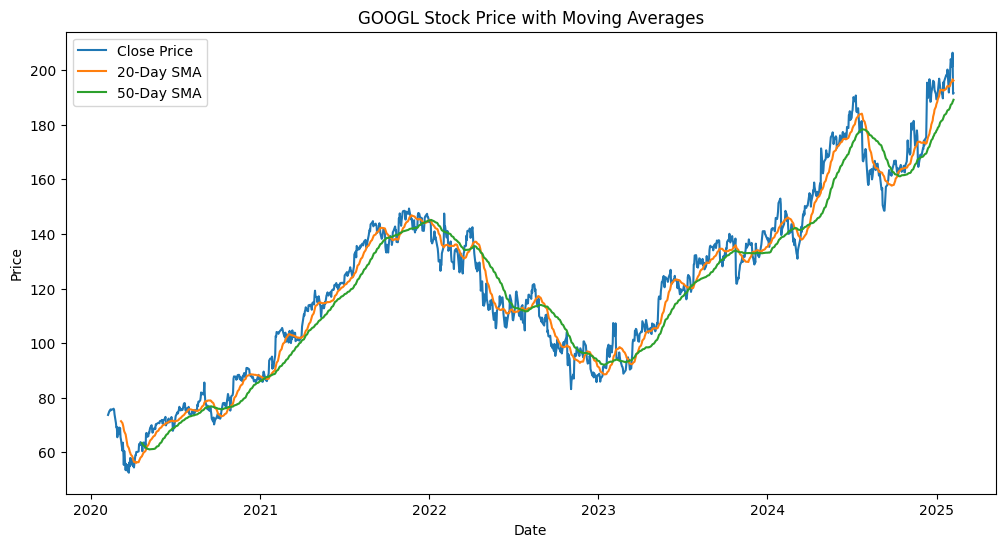

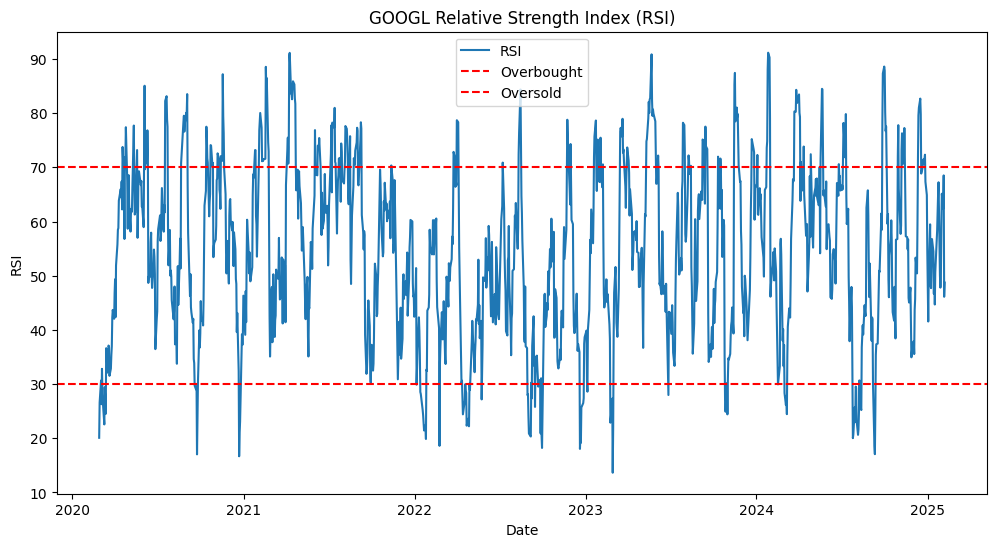

In [39]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

# Set the ticker symbol
ticker = "GOOGL"

# Download historical data
data = yf.download(ticker, period="5y")

# --- Fundamental Analysis ---

# Get basic financial information
financials = yf.Ticker(ticker).info

# Print selected financial metrics
print("**Financial Information:**")
print(f"Market Cap: {financials['marketCap']:,}")
print(f"Trailing PE: {financials['trailingPE']}")
print(f"Price to Book: {financials['priceToBook']}")
print(f"Debt to Equity: {financials['debtToEquity']}")

# --- Technical Analysis ---

# Calculate moving averages
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["SMA_50"] = data["Close"].rolling(window=50).mean()

# Calculate Relative Strength Index (RSI)
delta = data["Close"].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data["RSI"] = 100 - (100 / (1 + rs))

# --- Chart Plotting ---

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close Price")
plt.plot(data["SMA_20"], label="20-Day SMA")
plt.plot(data["SMA_50"], label="50-Day SMA")
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Plot RSI indicator
plt.figure(figsize=(12, 6))
plt.plot(data["RSI"], label="RSI")
plt.axhline(y=30, color="r", linestyle="--", label="Overbought")
plt.axhline(y=70, color="r", linestyle="--", label="Oversold")
plt.title(f"{ticker} Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()

# Display plots
plt.show()